In [49]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [50]:
from sklearn.datasets import make_circles


X,y = make_circles(n_samples = 5000,noise = 0.01,random_state = 42)
print(X[:5])

[[-0.78841308 -0.58117513]
 [ 0.78417196  0.15729673]
 [ 0.7435998   0.3022489 ]
 [-0.88427763  0.47703361]
 [-0.18849092  0.97167101]]


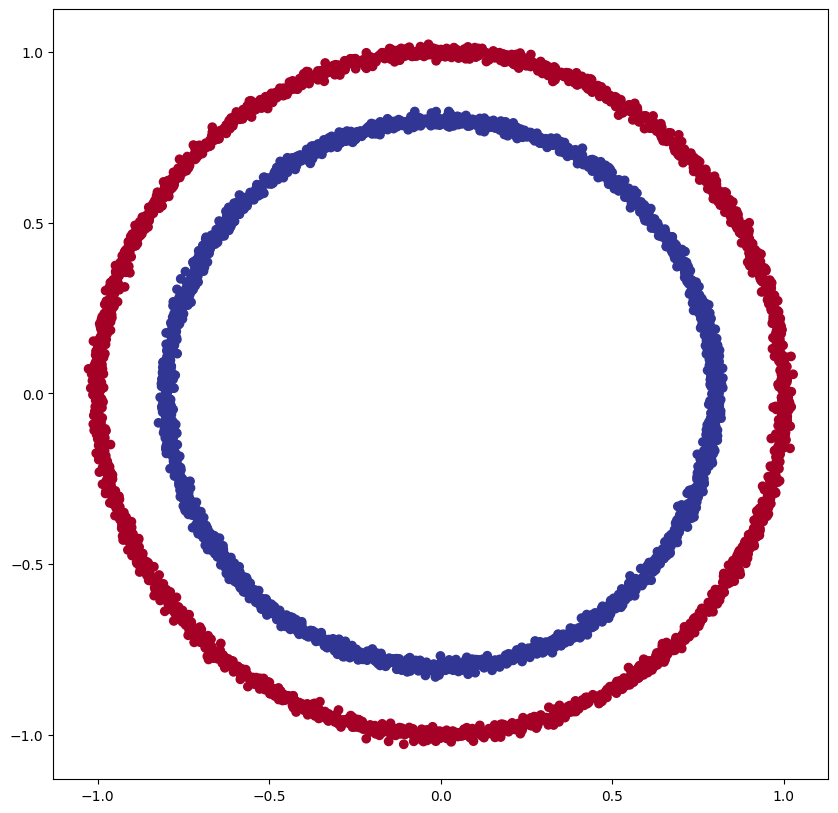

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.scatter(X[:,0],X[:,1],c = y,cmap=plt.cm.RdYlBu)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
Y_train = torch.from_numpy(Y_train)
Y_test = torch.from_numpy(Y_test)



In [53]:
X_train = X_train.to(torch.float32)
X_test = X_test.to(torch.float32)
Y_train = Y_train.to(torch.float32)
Y_test = Y_test.to(torch.float32)

In [60]:
class TejClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2,out_features = 10)
    self.layer2 = nn.Linear(in_features = 10,out_features = 5)
    self.layer3 = nn.Linear(in_features = 5,out_features = 1)
    self.relu = nn.ReLU()

  def forward(self,X):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(X)))))




model = TejClassifier()



In [73]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model.parameters(),lr = 0.001)



In [62]:



def accuracy(y_test,y_pred):
  y_pred = (y_pred>=0.5).float()
  correct = (y_test==y_pred).sum().item()
  return correct/len(y_test)


In [74]:
epoches = 10000

for epoch in range(epoches):
  model.train()
  y_logits = model(X_train).squeeze()
  y_pred = torch.sigmoid(y_logits)

  loss = loss_fn(y_logits,Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  train_acc = accuracy(Y_train,y_pred)

  model.eval()
  y_logits = model(X_test).squeeze()
  y_pred = torch.sigmoid(y_logits)
  test_loss = loss_fn(y_logits,Y_test)
  test_acc = accuracy(Y_test,y_pred)

  if epoch%100==0:
    print(f"Epoch:{epoch}|Train_Loss:{loss}|Train_Acc:{train_acc}|Test_Loss:{test_loss}|Test_Acc:{test_acc}")

Epoch:0|Train_Loss:0.0008229921222664416|Train_Acc:1.0|Test_Loss:0.0008679567836225033|Test_Acc:1.0
Epoch:100|Train_Loss:0.000822987116407603|Train_Acc:1.0|Test_Loss:0.0008679589373059571|Test_Acc:1.0
Epoch:200|Train_Loss:0.0008229064987972379|Train_Acc:1.0|Test_Loss:0.0008678810554556549|Test_Acc:1.0
Epoch:300|Train_Loss:0.0008229035884141922|Train_Acc:1.0|Test_Loss:0.0008678798330947757|Test_Acc:1.0
Epoch:400|Train_Loss:0.000822899048216641|Train_Acc:1.0|Test_Loss:0.0008678817539475858|Test_Acc:1.0
Epoch:500|Train_Loss:0.0008228204096667469|Train_Acc:1.0|Test_Loss:0.0008678057929500937|Test_Acc:1.0
Epoch:600|Train_Loss:0.0008228190126828849|Train_Acc:1.0|Test_Loss:0.000867806316819042|Test_Acc:1.0
Epoch:700|Train_Loss:0.0008228177903220057|Train_Acc:1.0|Test_Loss:0.0008678098674863577|Test_Acc:1.0
Epoch:800|Train_Loss:0.0008227403159253299|Train_Acc:1.0|Test_Loss:0.0008677308796904981|Test_Acc:1.0
Epoch:900|Train_Loss:0.0008227364742197096|Train_Acc:1.0|Test_Loss:0.000867731927428394

<ipython-input-75-a5634f67fe70>:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c="green", s=40, cmap=plt.cm.RdYlBu)


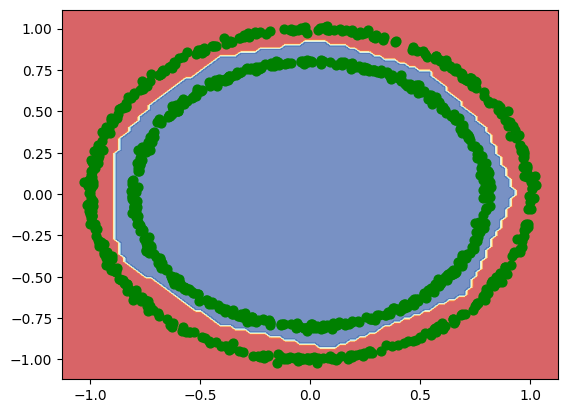

In [75]:
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c="green", s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plot_decision_boundary(model, X_test, y_test)